<a href="https://colab.research.google.com/github/tan003600/CSE422_AI/blob/main/Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd #for csv file operation
import matplotlib.pyplot as plt #for graphs
from sklearn.metrics import accuracy_score
from sklearn.impute import SimpleImputer #for imputing value [3]
import seaborn as sns #for heatmaps[2]
from sklearn.preprocessing import LabelEncoder #for encoding cat values [3]
from sklearn.preprocessing import MinMaxScaler #for normalizing and scaling feature [3]
import numpy as np
from sklearn.model_selection import train_test_split #for spliting dataset
from sklearn.linear_model import LogisticRegression #for logistic regression model
from sklearn.neural_network import MLPClassifier #for NN model
from sklearn.naive_bayes import GaussianNB #for naive bayes model
from sklearn.metrics import(precision_score, recall_score, confusion_matrix, classification_report, accuracy_score) #for model comparison operation [6]
from sklearn.preprocessing import label_binarize #for multiclass ouput handeling
from sklearn.metrics import roc_curve, auc #for roc and auc

# Dataset

In [ ]:
 library=pd.read_csv("/content/sample_data/Customer_Category_Classifier_Dataset.csv")

In [ ]:
library

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,NaN,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,NaN,High,6.0,Cat_6,A
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,Male,No,22,No,NaN,0.0,Low,7.0,Cat_1,D
8064,464685,Male,No,35,No,Executive,3.0,Low,4.0,Cat_4,D
8065,465406,Female,No,33,Yes,Healthcare,1.0,Low,1.0,Cat_6,D
8066,467299,Female,No,27,Yes,Healthcare,1.0,Low,4.0,Cat_6,B


# Shape Check

11 features are here as the column count is indicating the number of type of data given in the dataset

8068 data points are here as the row count is from 0 to 8067.

Categorical features: Gender, Ever_Married, Graduated, Profession, Spending_Score, Var_1, Segmentation

Quantitative features: Age, Work_Experience, Family_Size

ID: Not a useful feature for prediction—should be dropped

In [ ]:
library.shape

(8068, 11)

In [ ]:
print ('Shape of the dataset is {}. This dataset contains {} rows and {} columns.'.format(library.shape,library.shape[0],library.shape[1]))

Shape of the dataset is (8068, 11). This dataset contains 8068 rows and 11 columns.


# Classification or Regression Problem

If given dataset's targeted column values are object/string type and there are less than 20 types of values in that column than it's a Classification problem, else if the targeted column's values are numeric and float numbers with many distinct values it's a Regression problem. Target values are discrete integers with few classes can be Classificaion problem also (e.g., 0, 1, 2)

In [ ]:
target = 'Segmentation'
if library[target].dtype == 'object' or library[target].nunique() < 20:
    print("\nThe given dataset is a Classification problem.")
else:
    print("\nThe given dataset is a Regression problem.")


The given dataset is a Classification problem.


# Quantitive/Categorical Data

In [ ]:
print("\nColumns:", library.columns.tolist())


Columns: ['ID', 'Gender', 'Ever_Married', 'Age', 'Graduated', 'Profession', 'Work_Experience', 'Spending_Score', 'Family_Size', 'Var_1', 'Segmentation']


In [ ]:
library_df = library.select_dtypes(include='number')
library_num=library_df.columns.tolist()
print(f'There are {len(library_num)} numerical features:', '\n')
print(library_num)

There are 4 numerical features: 

['ID', 'Age', 'Work_Experience', 'Family_Size']


In [ ]:
library_cat = library.select_dtypes(include='object')
library_obj=library_cat.columns.tolist()
print(f'There are {len(library_obj)} categorical features:', '\n')
print(library_obj)

There are 7 categorical features: 

['Gender', 'Ever_Married', 'Graduated', 'Profession', 'Spending_Score', 'Var_1', 'Segmentation']


# Correlation of all the features

corr() takes only numerical datas to process

We have checked the correlation of the dataset but in this dataset, we couldn't find any major correlation. All the features are necessary

In [ ]:
library_df = pd.DataFrame(library.select_dtypes(include='number'))

In [ ]:
library_cat=pd.DataFrame(library.select_dtypes(include='object'))

In [ ]:
library_corr=library_df.corr()
library_corr

,ID,Age,Work_Experience,Family_Size
ID,1.000000,-0.005055,-0.030688,0.011801
Age,-0.005055,1.000000,-0.190789,-0.280517
Work_Experience,-0.030688,-0.190789,1.000000,-0.063234
Family_Size,0.011801,-0.280517,-0.063234,1.000000


<Axes: >

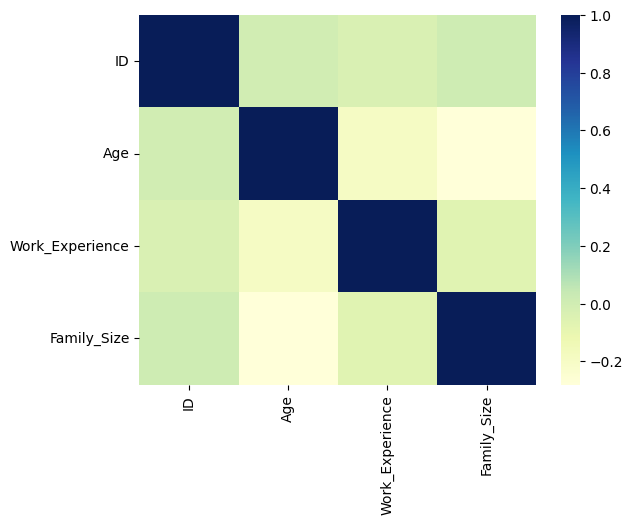

In [ ]:
sns.heatmap(library_corr, cmap = 'YlGnBu')

In [ ]:
library_copy=library.copy()
for col in library_cat:
    library_copy[col] = library_copy[col].astype('category').cat.codes
library_copy

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,1,0,22,0,5,1.0,2,4.0,3,3
1,462643,0,1,38,1,2,NaN,0,3.0,3,0
2,466315,0,1,67,1,2,1.0,2,1.0,5,1
3,461735,1,1,67,1,7,0.0,1,2.0,5,1
4,462669,0,1,40,1,3,NaN,1,6.0,5,0
...,...,...,...,...,...,...,...,...,...,...,...
8063,464018,1,0,22,0,-1,0.0,2,7.0,0,3
8064,464685,1,0,35,0,4,3.0,2,4.0,3,3
8065,465406,0,0,33,1,5,1.0,2,1.0,5,3
8066,467299,0,0,27,1,5,1.0,2,4.0,5,1


In [ ]:
whole_corr=library_copy.corr()
whole_corr

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
ID,1.000000,0.006155,0.012817,-0.005055,-0.019422,0.000249,-0.030688,-0.018949,0.011801,0.003726,-0.009104
Gender,0.006155,1.000000,0.115370,0.030216,-0.034869,0.025169,-0.059878,-0.054261,0.055911,0.034615,0.026403
Ever_Married,0.012817,0.115370,1.000000,0.524357,0.186638,-0.132237,-0.092650,-0.565727,-0.077115,0.090880,-0.203853
Age,-0.005055,0.030216,0.524357,1.000000,0.221529,0.041502,-0.190789,-0.269544,-0.280517,0.156902,-0.243552
Graduated,-0.019422,-0.034869,0.186638,0.221529,1.000000,-0.275368,0.024016,-0.142964,-0.223077,0.130773,-0.165599
Profession,0.000249,0.025169,-0.132237,0.041502,-0.275368,1.000000,-0.020044,0.226765,0.086066,-0.035985,0.200637
Work_Experience,-0.030688,-0.059878,-0.092650,-0.190789,0.024016,-0.020044,1.000000,0.048292,-0.063234,0.023254,0.012993
Spending_Score,-0.018949,-0.054261,-0.565727,-0.269544,-0.142964,0.226765,0.048292,1.000000,-0.114531,-0.033751,0.100572
Family_Size,0.011801,0.055911,-0.077115,-0.280517,-0.223077,0.086066,-0.063234,-0.114531,1.000000,-0.138106,0.196213
Var_1,0.003726,0.034615,0.090880,0.156902,0.130773,-0.035985,0.023254,-0.033751,-0.138106,1.000000,-0.019638


<Axes: >

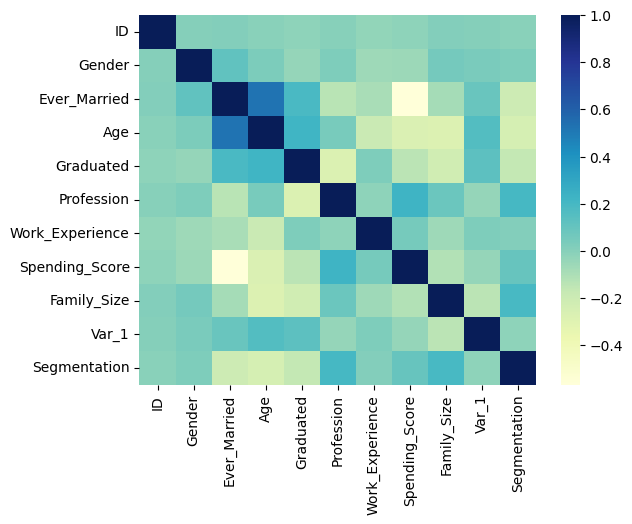

In [ ]:
sns.heatmap(whole_corr, cmap = 'YlGnBu')

# Unique Values in Output

In [ ]:
count = library['Segmentation'].value_counts()
print(count)

Segmentation
D    2268
A    1972
C    1970
B    1858
Name: count, dtype: int64


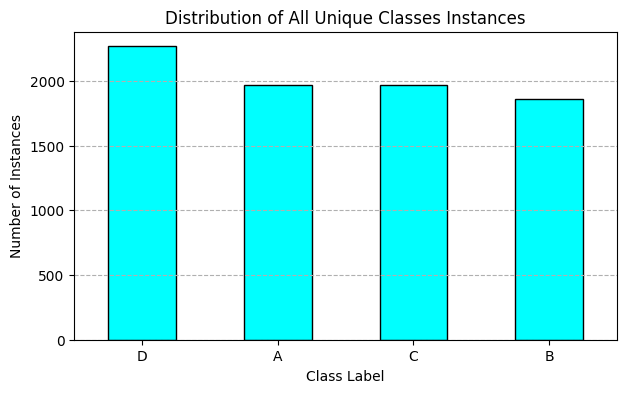

In [ ]:
plt.figure(figsize=(7, 4))
count.plot(kind='bar', color='cyan', edgecolor='black')
plt.title('Distribution of All Unique Classes Instances')
plt.xlabel('Class Label')
plt.ylabel('Number of Instances')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

# Data analysis

In [ ]:
library.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8068 entries, 0 to 8067
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               8068 non-null   int64  
 1   Gender           8068 non-null   object 
 2   Ever_Married     7928 non-null   object 
 3   Age              8068 non-null   int64  
 4   Graduated        7990 non-null   object 
 5   Profession       7944 non-null   object 
 6   Work_Experience  7239 non-null   float64
 7   Spending_Score   8068 non-null   object 
 8   Family_Size      7733 non-null   float64
 9   Var_1            7992 non-null   object 
 10  Segmentation     8068 non-null   object 
dtypes: float64(2), int64(2), object(7)
memory usage: 693.5+ KB


In [ ]:
library.isnull().sum()

,0
ID,0
Gender,0
Ever_Married,140
Age,0
Graduated,78
Profession,124
Work_Experience,829
Spending_Score,0
Family_Size,335
Var_1,76


In [ ]:
library_df.describe()

,ID,Age,Work_Experience,Family_Size
count,8068.000000,8068.000000,7239.000000,7733.000000
mean,463479.214551,43.466906,2.641663,2.850123
std,2595.381232,16.711696,3.406763,1.531413
min,458982.000000,18.000000,0.000000,1.000000
25%,461240.750000,30.000000,0.000000,2.000000
50%,463472.500000,40.000000,1.000000,3.000000
75%,465744.250000,53.000000,4.000000,4.000000
max,467974.000000,89.000000,14.000000,9.000000


In [ ]:
library_df.describe().T

,count,mean,std,min,25%,50%,75%,max
ID,8068.0,463479.214551,2595.381232,458982.0,461240.75,463472.5,465744.25,467974.0
Age,8068.0,43.466906,16.711696,18.0,30.00,40.0,53.00,89.0
Work_Experience,7239.0,2.641663,3.406763,0.0,0.00,1.0,4.00,14.0
Family_Size,7733.0,2.850123,1.531413,1.0,2.00,3.0,4.00,9.0


In [ ]:
library_cat.describe().T

,count,unique,top,freq
Gender,8068,2,Male,4417
Ever_Married,7928,2,Yes,4643
Graduated,7990,2,Yes,4968
Profession,7944,9,Artist,2516
Spending_Score,8068,3,Low,4878
Var_1,7992,7,Cat_6,5238
Segmentation,8068,4,D,2268


# Bar Chart for all columns

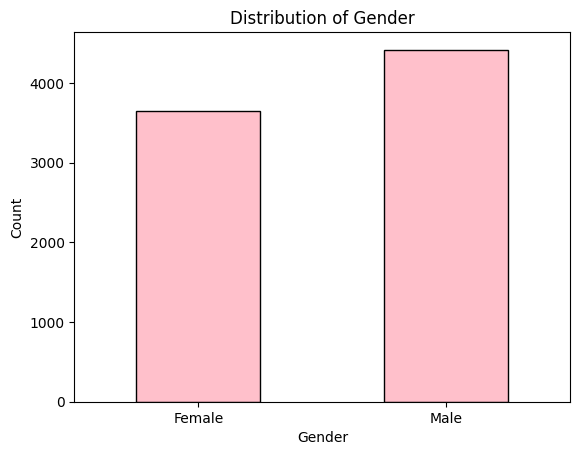

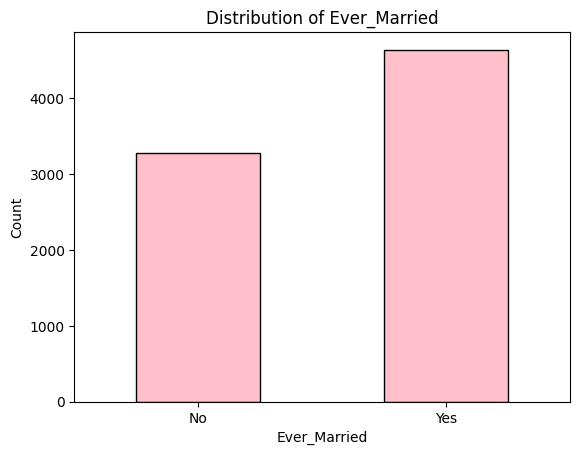

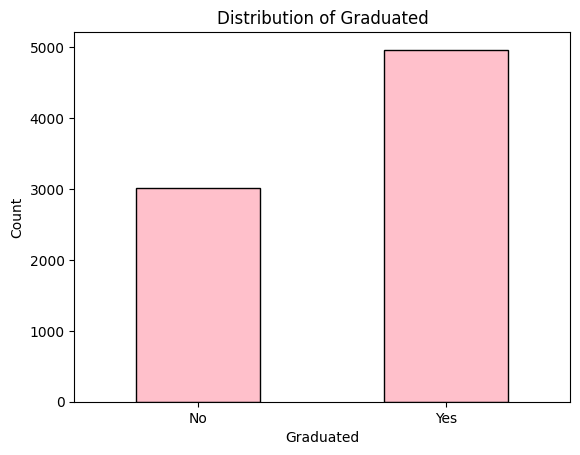

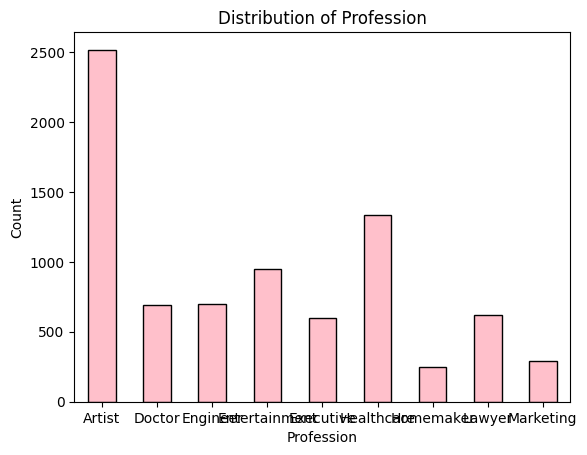

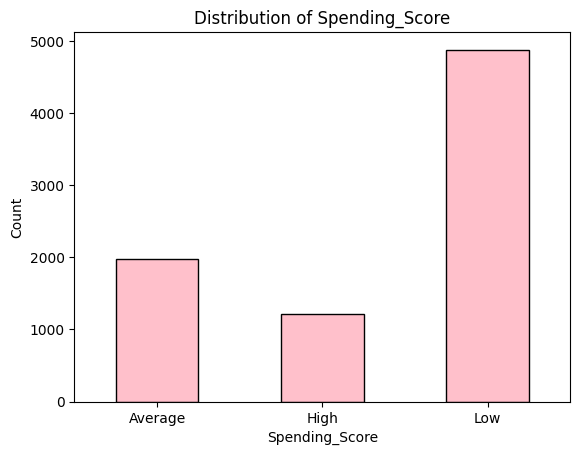

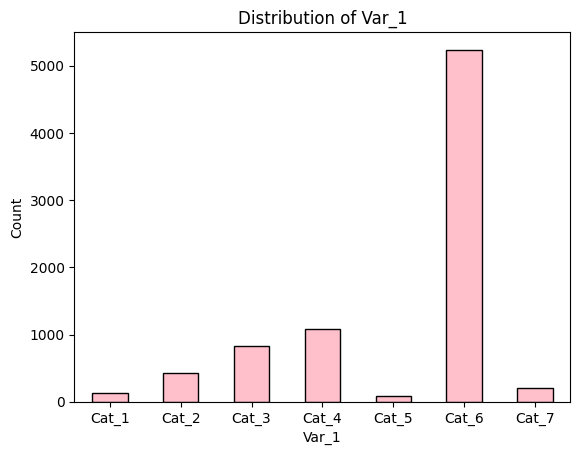

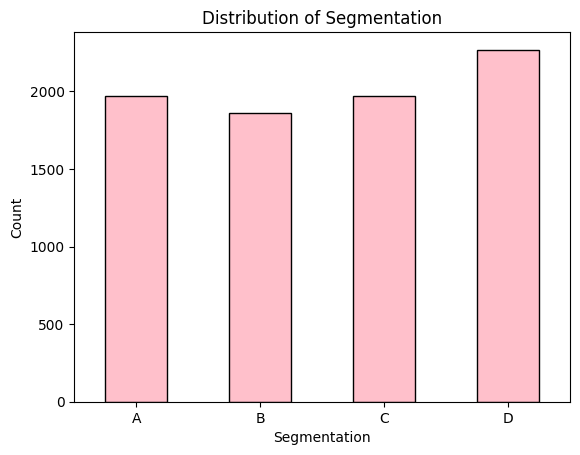

In [ ]:
for col in library_cat:
    plt.title(f'Distribution of {col}')
    library[col].value_counts().sort_index().plot(kind='bar', rot=0, xlabel=col, ylabel='Count', edgecolor='black', color='pink')
    plt.show()

# Heatmap

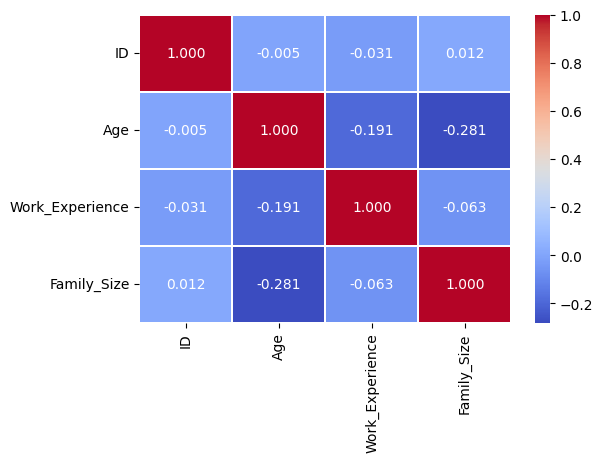

In [ ]:
plt.figure(figsize=(6, 4))
sns.heatmap(library_corr, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

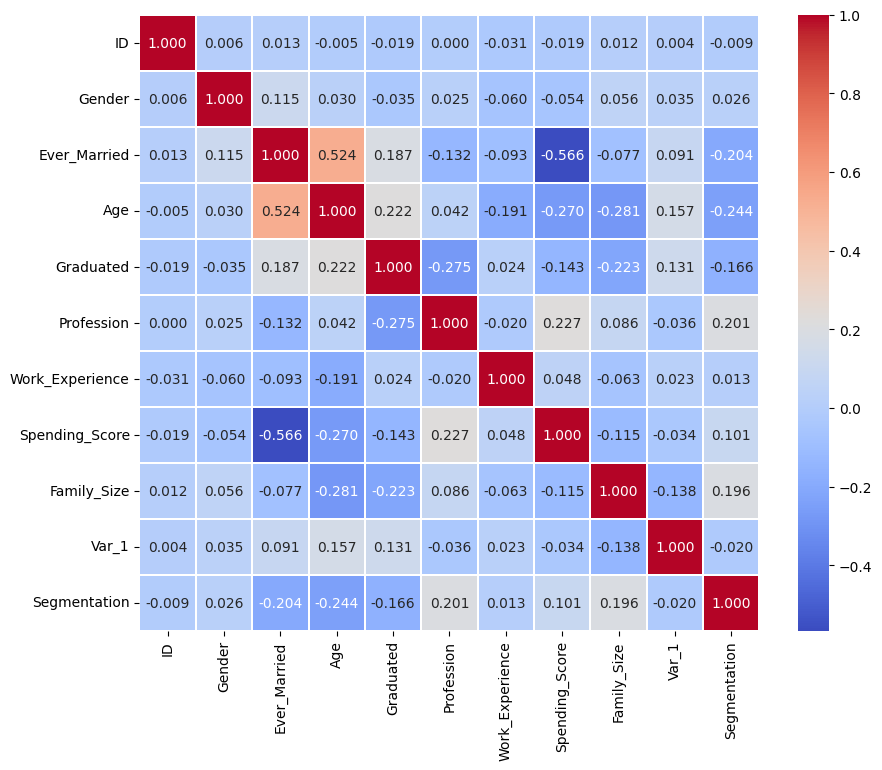

In [ ]:
plt.figure(figsize=(10, 8))
sns.heatmap(whole_corr, annot=True, cmap='coolwarm', fmt='.3f', linewidths=0.3)
plt.show()

# Skewness

In [ ]:
library_skew=library_df.skew()
print(library_skew)

ID                 0.002435
Age                0.696021
Work_Experience    1.306226
Family_Size        1.010804
dtype: float64


*ID (0.002435): Almost symmetrical – no transformation needed.

*AGE (0.696021): Slightly right-skewed – not a concern.

*WORK_EXPERIENCE (1.306226): Highly right-skewed – most values are 1 or 0; likely a categorical variable.

*FAMILY_SIZE (1.020804): Highly right-skewed – most family have same numbers of members

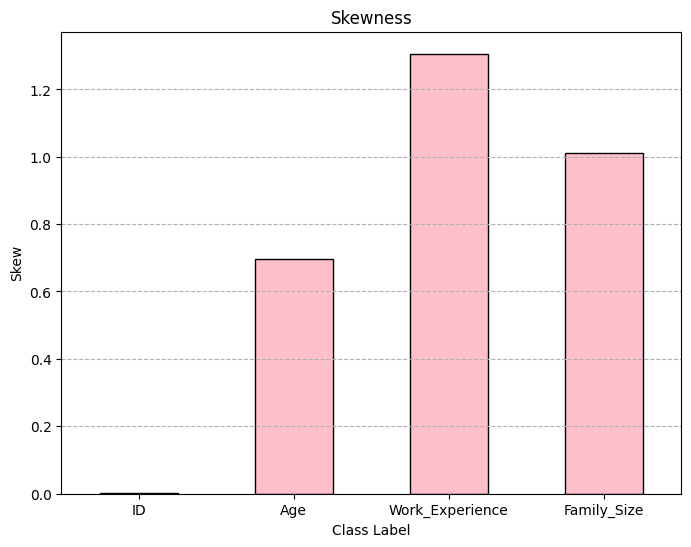

In [ ]:
plt.figure(figsize=(8,6))
library_skew.plot(kind='bar', color='pink', edgecolor='black')
plt.title('Skewness')
plt.xlabel('Class Label')
plt.ylabel('Skew')
plt.xticks(rotation=0)
plt.grid(axis='y', linestyle='--')
plt.show()

# Hist Diagram

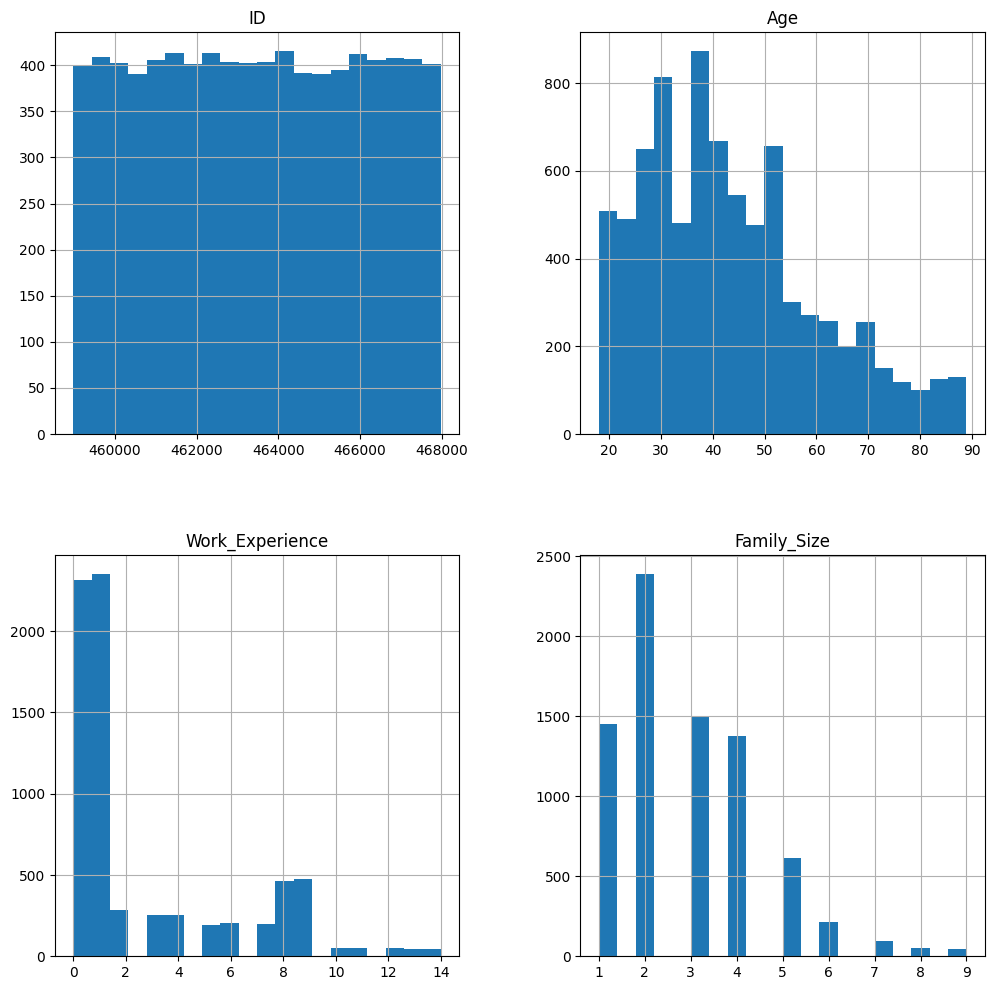

In [ ]:
library_df.hist(figsize=(12,12),bins=20)
plt.show()

# Density plot of Numerical features

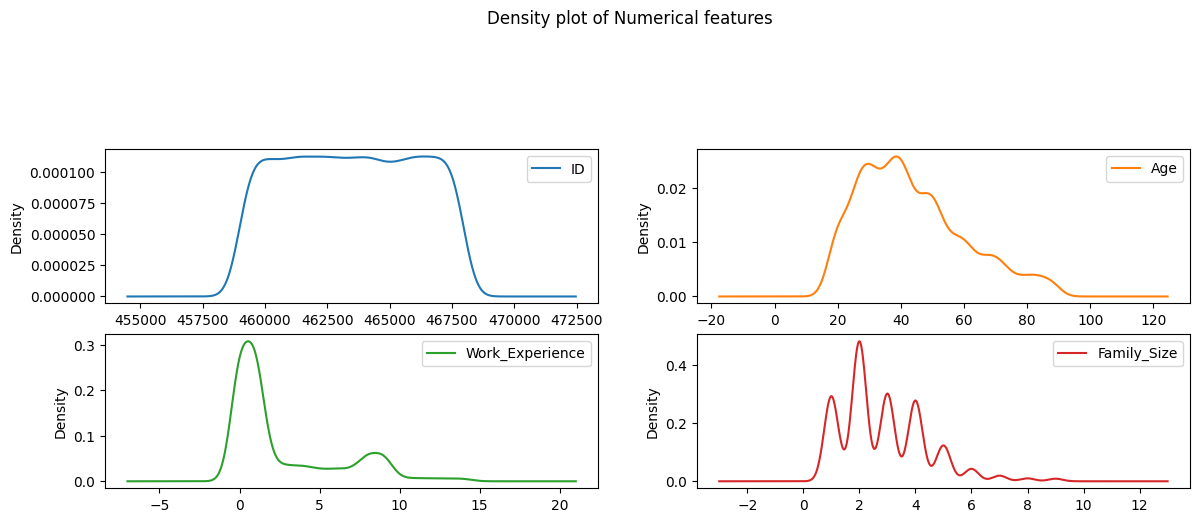

In [ ]:
library_df.plot(kind='density',figsize=(14,14),subplots=True,layout=(6,2),title="Density plot of Numerical features",sharex=False)
plt.show()

# Handeling Null Values

Impute rather than delete.

As, no column has excessive missing data (>50%). Deleting rows with any missing value would result in losing over 10% of your dataset, which is significant.Most columns have low missing percentages, making imputation practical.

In [ ]:
for col in library.columns:
    if library[col].isnull().sum() > 0:
        if library[col].dtype == "object":
            mode_value = library[col].mode()[0]
            library[col] = library[col].fillna(mode_value)
        else:
            median_value = library[col].median()
            library[col] = library[col].fillna(median_value)

print("Missing values after filling:")
print(library.isnull().sum())

library = library.dropna(axis=0, how='any')

Missing values after filling:
ID                 0
Gender             0
Ever_Married       0
Age                0
Graduated          0
Profession         0
Work_Experience    0
Spending_Score     0
Family_Size        0
Var_1              0
Segmentation       0
dtype: int64


# Categorical Value Encoding

In [ ]:
x = library.drop(target, axis=1)
y = library[target]

In [ ]:
le = LabelEncoder()

for col in x.columns:
    if x[col].dtype == 'object':
        x[col] = le.fit_transform(x[col])

# Feature Scaling

In [ ]:
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x)
x = pd.DataFrame(x_scaled, columns=x.columns, index=x.index)
library.head()

,ID,Gender,Ever_Married,Age,Graduated,Profession,Work_Experience,Spending_Score,Family_Size,Var_1,Segmentation
0,462809,Male,No,22,No,Healthcare,1.0,Low,4.0,Cat_4,D
1,462643,Female,Yes,38,Yes,Engineer,1.0,Average,3.0,Cat_4,A
2,466315,Female,Yes,67,Yes,Engineer,1.0,Low,1.0,Cat_6,B
3,461735,Male,Yes,67,Yes,Lawyer,0.0,High,2.0,Cat_6,B
4,462669,Female,Yes,40,Yes,Entertainment,1.0,High,6.0,Cat_6,A


# Data Splitting, Training and Testing

In [ ]:
xTrain, xTest, yTrain, yTest = train_test_split(x, y, test_size=0.3, random_state=40, stratify=y)

In [ ]:
xTrain.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5647 entries, 5006 to 6214
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               5647 non-null   float64
 1   Gender           5647 non-null   float64
 2   Ever_Married     5647 non-null   float64
 3   Age              5647 non-null   float64
 4   Graduated        5647 non-null   float64
 5   Profession       5647 non-null   float64
 6   Work_Experience  5647 non-null   float64
 7   Spending_Score   5647 non-null   float64
 8   Family_Size      5647 non-null   float64
 9   Var_1            5647 non-null   float64
dtypes: float64(10)
memory usage: 485.3 KB


In [ ]:
xTest.info()

<class 'pandas.core.frame.DataFrame'>
Index: 2421 entries, 1725 to 1740
Data columns (total 10 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   ID               2421 non-null   float64
 1   Gender           2421 non-null   float64
 2   Ever_Married     2421 non-null   float64
 3   Age              2421 non-null   float64
 4   Graduated        2421 non-null   float64
 5   Profession       2421 non-null   float64
 6   Work_Experience  2421 non-null   float64
 7   Spending_Score   2421 non-null   float64
 8   Family_Size      2421 non-null   float64
 9   Var_1            2421 non-null   float64
dtypes: float64(10)
memory usage: 208.1 KB


In [ ]:
yTrain.info()

<class 'pandas.core.series.Series'>
Index: 5647 entries, 5006 to 6214
Series name: Segmentation
Non-Null Count  Dtype 
--------------  ----- 
5647 non-null   object
dtypes: object(1)
memory usage: 88.2+ KB


In [ ]:
yTest.info()

<class 'pandas.core.series.Series'>
Index: 2421 entries, 1725 to 1740
Series name: Segmentation
Non-Null Count  Dtype 
--------------  ----- 
2421 non-null   object
dtypes: object(1)
memory usage: 37.8+ KB


# Models

# LogisticRegression

In [ ]:
modelLR = LogisticRegression()

modelLR.fit(xTrain, yTrain)

ypredLR = modelLR.predict(xTest)

# accuracy
accuracyLR = round(accuracy_score(yTest, ypredLR) * 100, 2)

print(accuracyLR)

49.48


# Naive Bayes

In [ ]:
modelNB = GaussianNB()
modelNB.fit(xTrain, yTrain)

ypredNB = modelNB.predict(xTest)

# accuracy
accuracyNB = round(accuracy_score(yTest, ypredNB) * 100, 2)

print(accuracyNB)

48.33


# Neural Network

In [ ]:
modelNN = MLPClassifier(hidden_layer_sizes=(100, 50), max_iter=500, random_state=42)
modelNN.fit(xTrain, yTrain)

ypredNN = modelNN.predict(xTest)

# Accuracy
accuracyNN = round(accuracy_score(yTest, ypredNN) * 100, 2)
print("Neural Network Accuracy:", accuracyNN)

Neural Network Accuracy: 51.47


# Model selection/Comparison analysis

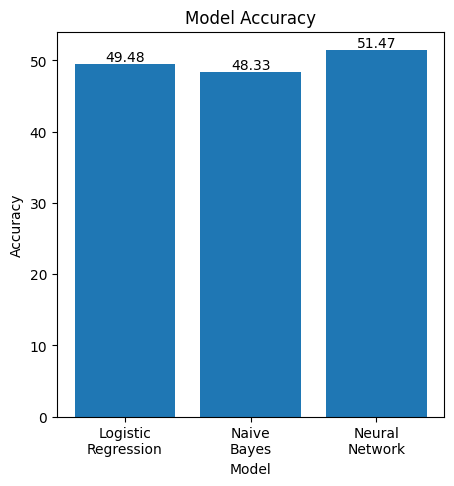

In [ ]:
models = ['Logistic\nRegression', 'Naive\nBayes', 'Neural\nNetwork']
accuracies = [accuracyLR, accuracyNB, accuracyNN]

plt.figure(figsize=(5, 5))
plt.bar(models, accuracies, tick_label=models)
plt.title('Model Accuracy')
plt.xlabel('Model')
plt.ylabel('Accuracy')

for i in range(len(models)):
    plt.text(models[i], accuracies[i], str(accuracies[i]), ha='center', va='bottom')

plt.show()

# Precision, recall comparison of each model

In [ ]:
models = [
    ('Logistic Regression', ypredLR),
    ('Naive Bayes', ypredNB),
    ('Neural Network', ypredNN)
]

matrix = []

for model, yPred in models:
    precision = precision_score(yTest, yPred, average='weighted', zero_division=1)
    recall = recall_score(yTest, yPred, average='weighted', zero_division=1)

    matrix.append({'Model': model, 'Precision': precision, 'Recall': recall})

matrixDF = pd.DataFrame(matrix)
print(matrixDF)

                 Model  Precision    Recall
0  Logistic Regression   0.470017  0.494837
1          Naive Bayes   0.452764  0.483271
2       Neural Network   0.511181  0.514663


# Confusion Matrix

# LogisticRegression

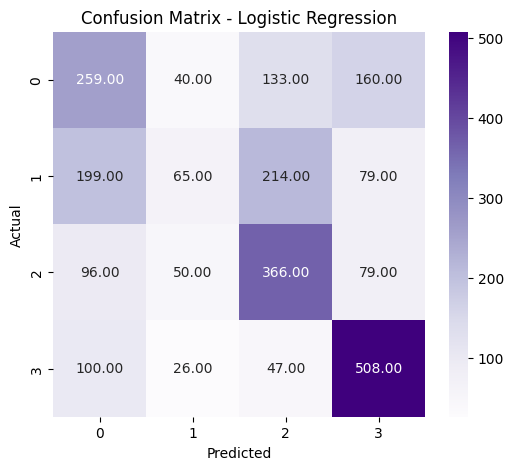

In [ ]:
cmLR = confusion_matrix(yTest, ypredLR)

plt.figure(figsize=(6, 5))
sns.heatmap(cmLR, annot=True, fmt='.2f', cmap='Purples')

plt.title("Confusion Matrix - Logistic Regression")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Naive Bayes

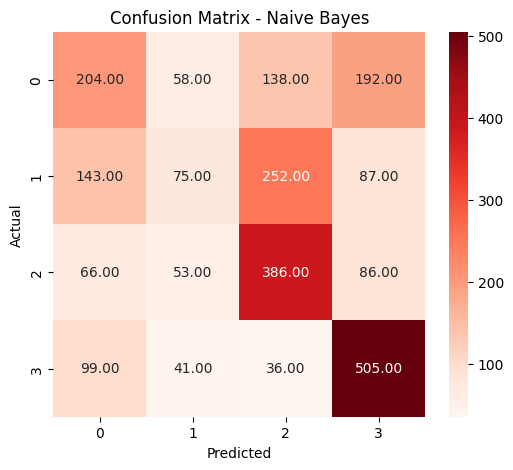

In [ ]:
cmNB = confusion_matrix(yTest, ypredNB)

plt.figure(figsize=(6, 5))
sns.heatmap(cmNB, annot=True, fmt='.2f', cmap='Reds')

plt.title("Confusion Matrix - Naive Bayes")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# Neural Network

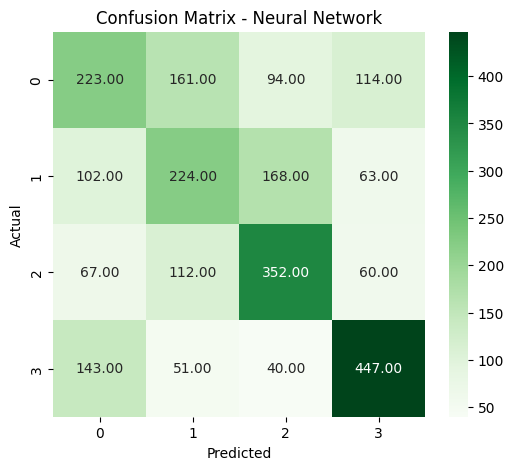

In [ ]:
cmLR = confusion_matrix(yTest, ypredNN)

plt.figure(figsize=(6, 5))
sns.heatmap(cmLR, annot=True, fmt='.2f', cmap='Greens')

plt.title("Confusion Matrix - Neural Network")
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

# AUC score, ROC curve

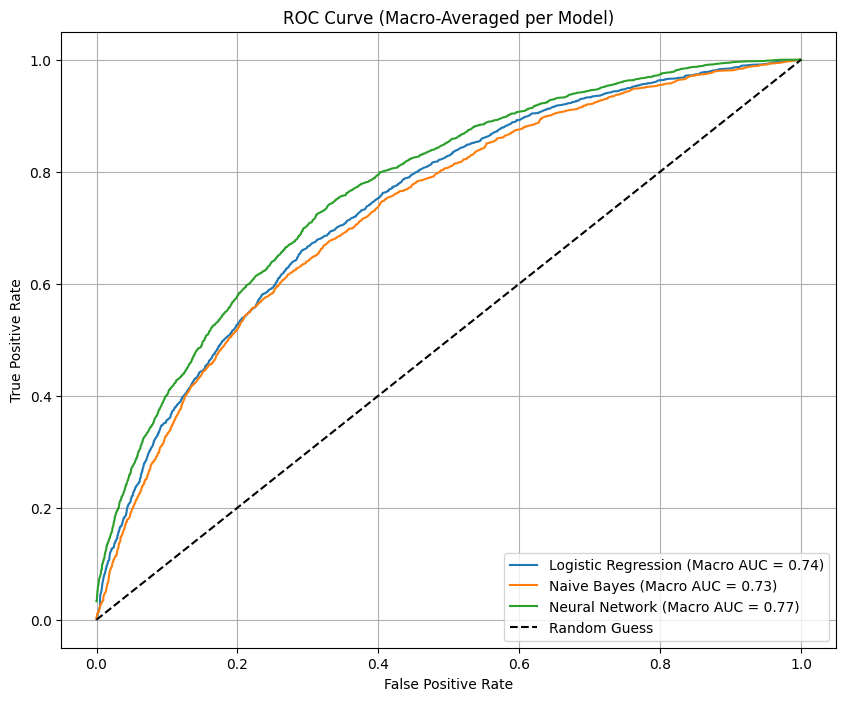

In [ ]:
yTest_bin = label_binarize(yTest, classes=np.unique(yTest))
n_classes = yTest_bin.shape[1]

models_prob = [
    ('Logistic Regression', modelLR),
    ('Naive Bayes', modelNB),
    ('Neural Network', modelNN)
]

plt.figure(figsize=(10, 8))

for name, model in models_prob:
    # Predict class probabilities
    y_score = model.predict_proba(xTest)

    # Compute macro-average ROC curve and AUC
    fpr = dict()
    tpr = dict()
    roc_auc = dict()

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(yTest_bin[:, i], y_score[:, i])
        roc_auc[i] = auc(fpr[i], tpr[i])

    # Interpolate to compute macro-average ROC
    all_fpr = np.unique(np.concatenate([fpr[i] for i in range(n_classes)]))
    mean_tpr = np.zeros_like(all_fpr)

    for i in range(n_classes):
        mean_tpr += np.interp(all_fpr, fpr[i], tpr[i])

    mean_tpr /= n_classes

    macro_auc = auc(all_fpr, mean_tpr)
    plt.plot(all_fpr, mean_tpr, label=f"{name} (Macro AUC = {macro_auc:.2f})")

# Diagonal reference line
plt.plot([0, 1], [0, 1], 'k--', label='Random Guess')

# Plot aesthetics
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve (Macro-Averaged per Model)')
plt.legend(loc='lower right')
plt.grid()
plt.show()